In [28]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics

In [29]:
df=pd.read_csv('D:/ML MINI PROJECT/NFLX.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [30]:
df.shape

(1009, 7)

In [31]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [32]:
df.isnull().sum().any()

False

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [34]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [35]:
df.columns = df.columns.str.lower()

In [36]:
df[['year', 'month', 'day']] = df['date'].apply(lambda x: pd.Series(map(int, x.split('-'))))

In [37]:
df.drop(['date'], axis = 1, inplace = True)
df.head()

,open,high,low,close,adj close,volume,year,month,day
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2018,2,5
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2018,2,6
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2018,2,7
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,2018,2,8
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,2018,2,9


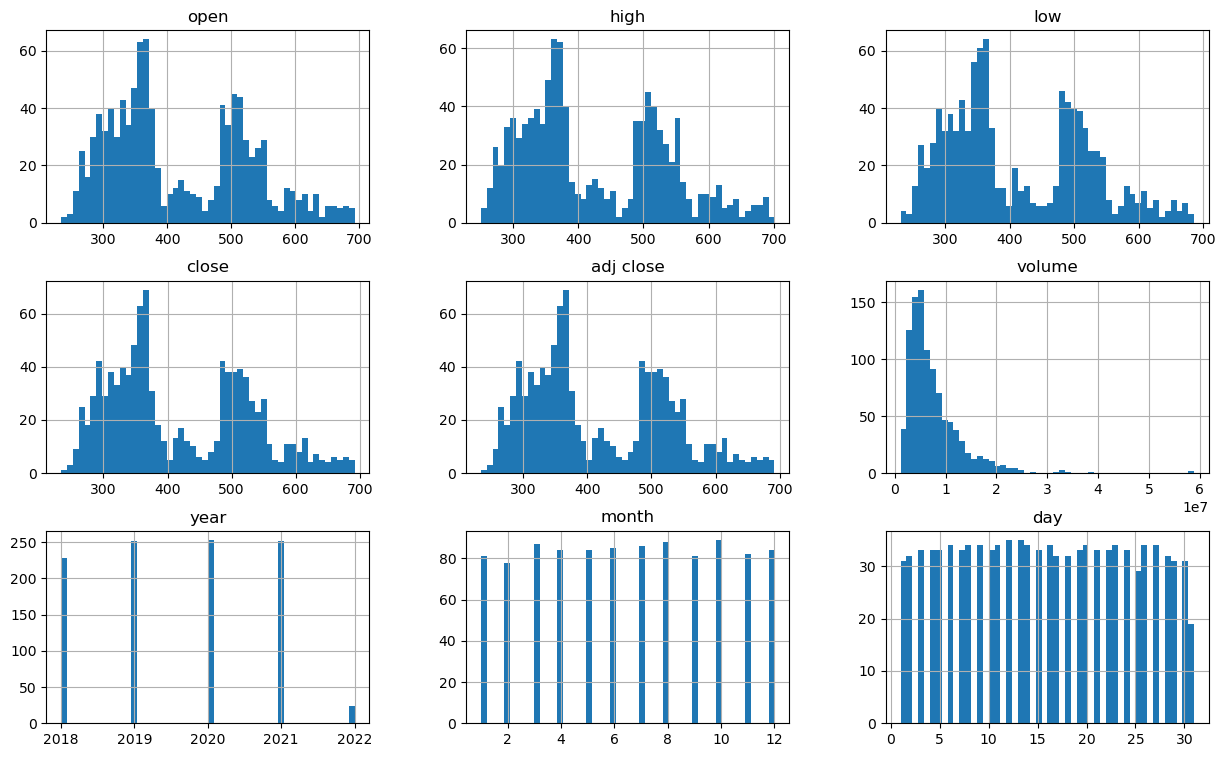

In [38]:
#DATA PREPROCESSING
df.hist(figsize = (15,9), bins = 50)
plt.show()

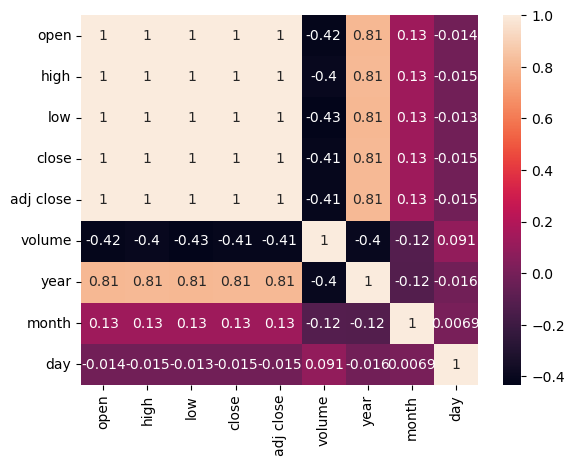

In [39]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [40]:
power = PowerTransformer('yeo-johnson')

In [41]:
transformed_df = power.fit_transform(df)
transformed_df = pd.DataFrame(transformed_df, columns = df.columns)

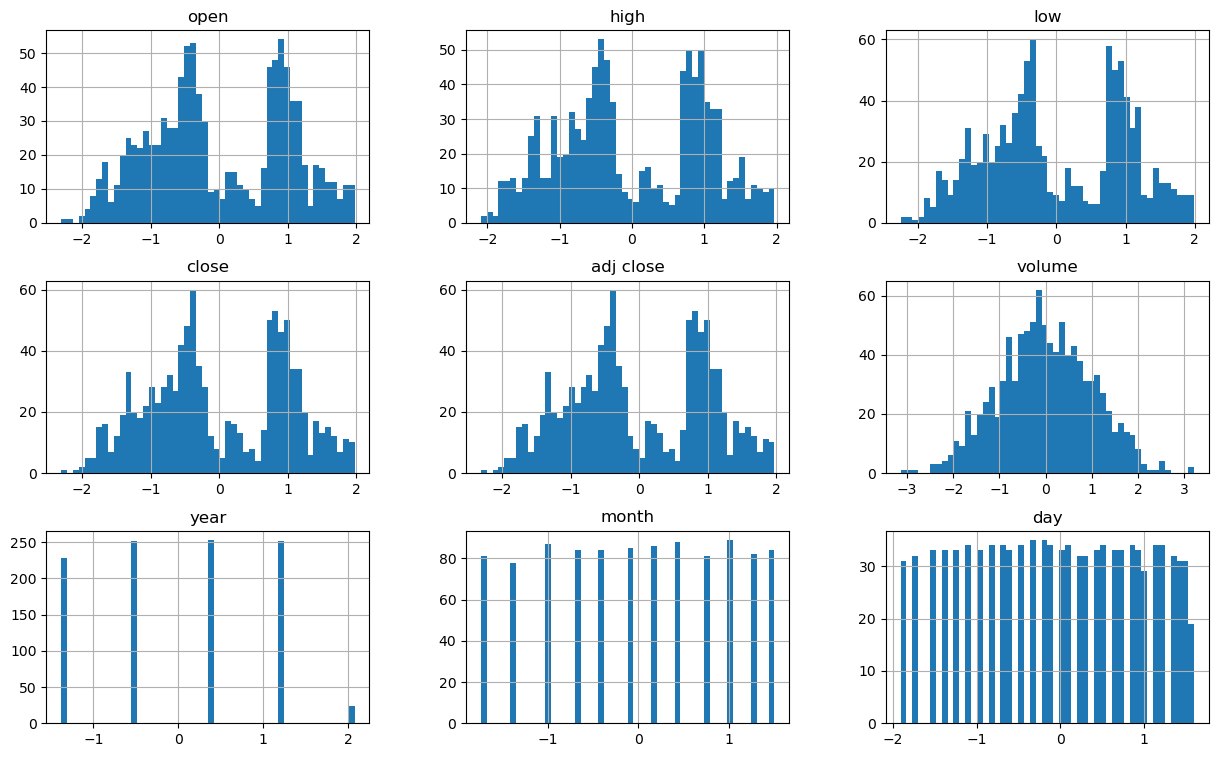

In [42]:
transformed_df.hist(figsize = (15,9), bins = 50)
plt.show()

In [43]:
transformed_df.columns

Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'year', 'month',
       'day'],
      dtype='object')

In [44]:
data=pd.read_csv('D:/ML MINI PROJECT/NFLX.csv')
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Adj Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [45]:
#randomforest
model_rand = RandomForestRegressor(n_estimators=200, random_state = 42)

In [46]:
model_rand.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [47]:
pred_rand = model_rand.predict(X_test)

#print(f'LINEAR REGRESSION r2_score : {r2_score(y_test,pred_lin)}')
#print(f'LINEAR REGRESSION mean_absolute_error : {mean_absolute_error(y_test,pred_lin)}')
print(f'RANDOM FOREST mean_absolute_error : {mean_absolute_error(y_test,pred_rand)}')
print()
print(f'RANDOM FOREST r2_score : {r2_score(y_test,pred_rand)}')


RANDOM FOREST mean_absolute_error : 3.715090479248964

RANDOM FOREST r2_score : 0.9975898331835773
